In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

In [59]:
from Simulation import *

env, observations_probabilities = generate_new_environment()

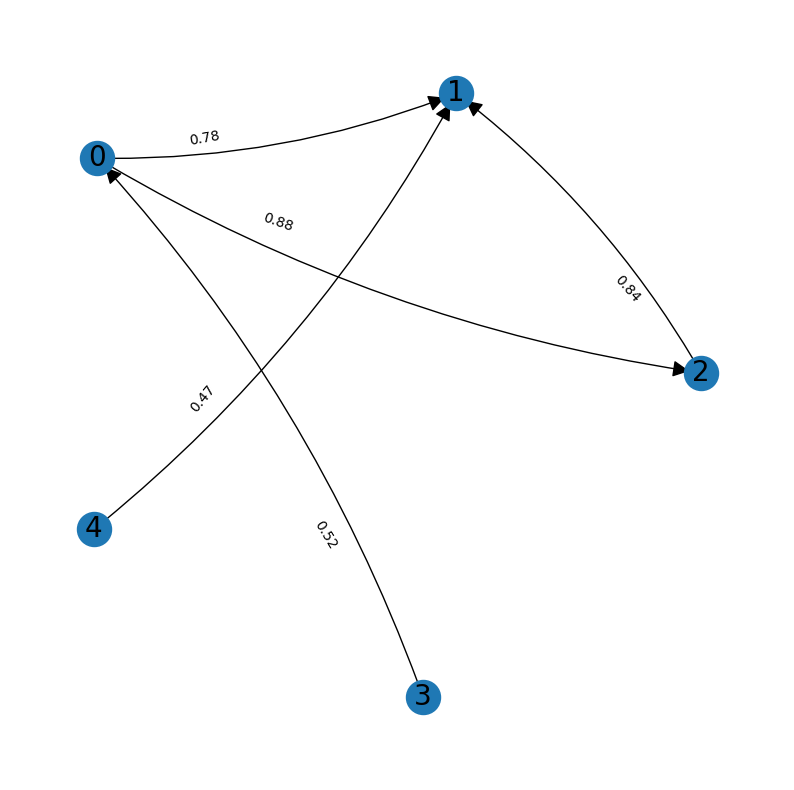

In [60]:
from Network import *
Network.print_graph(env.get_network().G)

In [61]:
ecomm = Ecommerce(B_cap, budgets, product_prices)

In [62]:
nodes_activation_probabilities, num_items_sold = estimate_nodes_activation_probabilities(
            env.network.get_adjacency_matrix(), env.get_users_reservation_prices(), 
            ecomm.product_prices, observations_probabilities
        )


In [63]:
exp_clicks = env.estimate_expected_user_alpha(ecomm.budgets / ecomm.B_cap)

optimal_allocation = ecomm.solve_optimization_problem(
    env.get_network().get_adjacency_matrix(), num_items_sold, 
    env.get_users_reservation_prices(), exp_clicks, nodes_activation_probabilities
    )


optimal solution found is: [40. 60. 40. 60.  0.]


In [6]:
from Simulation import *
import numpy as np
import random

from Utils import *
from constants import *

from Environment import *
from Non_Stationary_Environment import *

from Social_influence import *
from Network import Network

from Ecommerce import *
from Ecommerce3 import *
from Ecommerce5 import *
from Ecommerce6 import *

In [ ]:
# -----------STEP 6------------

swucb_rewards_per_experiment = []
swucb_sold_items_per_experiment = []

tau = np.floor(np.sqrt(T)).astype(int)

for e in tqdm(range(0, n_experiments), position=0, desc="n_experiment", leave=False):
    env, nodes_activation_probabilities, num_sold_items, observations_probabilities = generate_new_non_stationary_environment()

    ecomm6_ucb = Ecommerce6_SWUCB(
        B_cap, budgets, product_prices, tau)

    for t in tqdm(range(0, T), position=1, desc="n_iteration", leave=False):
        arm = ecomm6_ucb.pull_arm()
        reward, sold_items = env.round_step6(arm, num_sold_items)
        ecomm6_ucb.update(arm, reward, sold_items)

    swucb_rewards_per_experiment.append(ecomm6_ucb.collected_rewards)
    swucb_sold_items_per_experiment.append(ecomm6_ucb.collected_sold_items)

# opt  = np.sum(env.get_users_alpha(), axis=0)[1:]

# plot_regrets_step3(swucb_rewards_per_experiment, swucb_rewards_per_experiment, opt)
# plot_regrets_step3(swucb_sold_items_per_experiment, swucb_sold_items_per_experiment, num_items_sold)


